# RF. Size

- работать со случайным лесом — одним из наиболее распространенных семейств алгоритмов
- решать с его помощью задачи регрессии
- подбирать параметры случайного леса

В этом задании вам нужно проследить за изменением качества случайного леса в зависимости от количества деревьев в нем.

In [4]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [3]:
data = pd.read_csv('abalone.csv')

In [4]:
data.head(5)

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
data['Sex'] = data['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))

In [6]:
data.head(5)

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [8]:
Y = data['Rings']
del data['Rings']

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=1)

In [26]:
k = 1
array = []
results=[]
while k < 51:
    rf = RandomForestRegressor(n_estimators = k, random_state=1)
   
    results = cross_val_score(rf, data, Y, cv=kf,  scoring='r2')
    print results.mean()
    if results.mean() >= 0.52:
        print k + 1
    array.append(results.mean())
    k = k + 1


0.10213869487724367
0.33841675515802144
0.4035798494618691
0.44272239896668103
0.4640207660674969
0.4705816327587792
0.4758306163523006
0.4817418456255852
0.4883478130215681
0.49446412480247826
0.4933965550001963
0.4979658763976154
0.5021364605722853
0.5064286962257328
0.5083311970432101
0.5105131438322147
0.5138482947993028
0.5163275412739493
0.519034688136388
0.5186735928723822
0.5198354233542501
0.5201583536722211
23
0.5210172709366251
24
0.5224031825808091
25
0.5226174639676071
26
0.5238061581717052
27
0.5241223522188981
28
0.525053745123244
29
0.5259703756348931
30
0.5265378216675755
31
0.5270998544306023
32
0.5283894082092784
33
0.5296165561229277
34
0.5295639554438379
35
0.529517247440473
36
0.5295996267890184
37
0.52913141344746
38
0.5291602576334833
39
0.5292409810274339
40
0.529067015963163
41
0.5293420056911183
42
0.5295732065337546
43
0.5293754946648532
44
0.5291192337563251
45
0.5283754660277202
46
0.5285204275493458
47
0.5287049445791908
48
0.5296127515437734
49
0.5303944

In [ ]:
k = 1
array = []
results=[]
while k < 51:
    rf = RandomForestRegressor(n_estimators = k, random_state=1)
    results = cross_val_score(rf, data, Y, cv=kf,  scoring='r2')
    print results.mean()
    if results.mean() >= 0.52:
        print k + 1
    array.append(results.mean())
    k = k + 1

In [33]:
for n in range (1,51):
    score = 0
    rf = RandomForestRegressor(n_estimators = n, random_state=1)
    for train_ind, test_ind in kf.split(data):
        train = data.loc[train_ind]
        test = data.loc[test_ind]
        y_train = Y.loc[train_ind]
        y_test = Y.loc[test_ind]
        rf.fit(train, y_train)
        pred = rf.predict(test)
        score += r2_score(y_test, pred)
    print ("n = " + str(n) + "  score = " + str(score/5))
    
    

n = 1  score = 0.10213869487724367
n = 2  score = 0.33841675515802144
n = 3  score = 0.4035798494618691
n = 4  score = 0.44272239896668103
n = 5  score = 0.4640207660674969
n = 6  score = 0.4705816327587792
n = 7  score = 0.4758306163523006
n = 8  score = 0.4817418456255852
n = 9  score = 0.4883478130215681
n = 10  score = 0.49446412480247826
n = 11  score = 0.4933965550001963
n = 12  score = 0.4979658763976154
n = 13  score = 0.5021364605722853
n = 14  score = 0.5064286962257328
n = 15  score = 0.5083311970432101
n = 16  score = 0.5105131438322147
n = 17  score = 0.5138482947993028
n = 18  score = 0.5163275412739493
n = 19  score = 0.519034688136388
n = 20  score = 0.5186735928723822
n = 21  score = 0.5198354233542501
n = 22  score = 0.5201583536722211
n = 23  score = 0.5210172709366251
n = 24  score = 0.5224031825808091
n = 25  score = 0.5226174639676071
n = 26  score = 0.5238061581717052
n = 27  score = 0.5241223522188981
n = 28  score = 0.525053745123244
n = 29  score = 0.525970375

# gradiientnyi-bustingh-nad-rieshaiushchimi-dierieviami

- работать с градиентным бустингом и подбирать его гиперпараметры
- сравнивать разные способы построения композиций
- понимать, в каком случае лучше использовать случайный лес, а в каком — градиентный бустинг
- использовать метрику log-loss

Задача: предсказать произошла ли реакция с молекулами (данные https://www.kaggle.com/c/bioresponse)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss
import math
from sklearn.ensemble import RandomForestClassifier

In [5]:
data = pd.read_csv('gbm-data.csv')

In [6]:
data.head(2)

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0


In [7]:
Y = data['Activity']

In [8]:
y = Y.values

In [9]:
X = data[data.columns[1:]]

In [10]:
X.head(5)

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,...,0,0,0,0,0,0,0,0,0,0
1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,...,1,1,1,1,0,1,0,0,1,0
2,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,...,0,0,0,0,0,0,0,0,0,0
4,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,...,0,0,0,0,0,0,0,0,0,0


In [11]:
data_X = X.values

In [12]:
data_X

array([[0.        , 0.49700901, 0.1       , ..., 0.        , 0.        ,
        0.        ],
       [0.36666667, 0.60629148, 0.05      , ..., 0.        , 1.        ,
        0.        ],
       [0.0333    , 0.48012427, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.2       , 0.52056377, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.1       , 0.7656462 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.13333333, 0.53395198, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [13]:
X_train, X_test, y_train, y_test =  train_test_split(data_X, Y, test_size=0.8, random_state=42)

In [14]:
X_train

array([[0.1       , 0.74217246, 0.05      , ..., 0.        , 0.        ,
        0.        ],
       [0.0667    , 0.69949931, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.1       , 0.58858156, 0.25      , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.1       , 0.53375513, 0.05      , ..., 0.        , 0.        ,
        0.        ],
       [0.0667    , 0.52875957, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.6586791 , 0.05      , ..., 0.        , 0.        ,
        0.        ]])

n: 1
      Iter       Train Loss   Remaining Time 
         1           0.9702           14.94s
         2           0.8545           14.26s
         3           0.7683           13.91s
         4           0.6936           14.94s
         5           0.6607           14.16s
         6           0.6001           13.95s
         7           0.5658           14.61s
         8           0.5447           14.16s
         9           0.5155           13.90s
        10           0.4857           13.75s
        20           0.2281           12.49s
        30           0.1289           11.67s
        40           0.0877           10.96s
        50           0.0620           10.74s
        60           0.0414           10.49s
        70           0.0281            9.96s
        80           0.0188            9.31s
        90           0.0133            8.63s
       100           0.0092            7.99s
       200           0.0004            2.43s
staged_decision_function:
0.5964664658901574
0
st

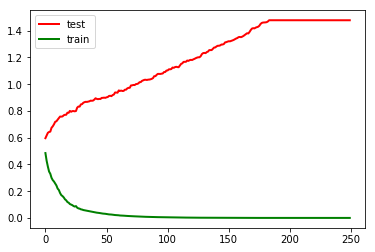

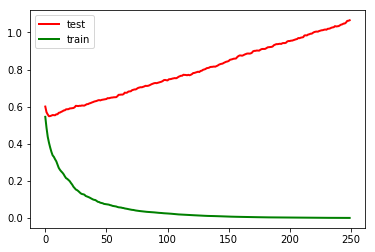

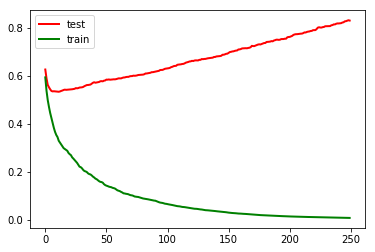

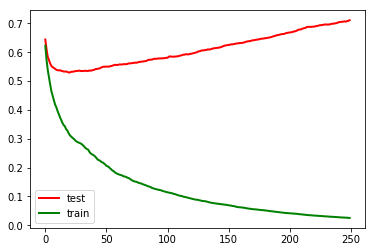

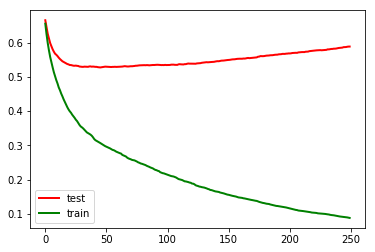

In [177]:
import matplotlib.pyplot as plt
%matplotlib inline
values =  [1, 0.5, 0.3, 0.2, 0.1]
for n in values:
    test_score = []
    train_score = []
    test_score_staged_pr_proba = []
    print('n: ' + str(n))
    gbc = GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241, learning_rate=n)
    gbc.fit(X_train, y_train)
    y_pred_test = gbc.staged_decision_function(X_test)
    y_pred_train = gbc.staged_decision_function(X_train)
   # y_pred_sigm_test = 1 / (1 + math.e(y_pred_test))
    #y_pred_sigm_train = 1 / (1 + math.e(y_pred_train))
    for i, pred in enumerate(y_pred_test):
        y_pred_sigm_test = 1. / (1. + math.e**(-pred))
        test_score.append(log_loss(y_test, y_pred_sigm_test))
    
    for i, pred in enumerate(gbc.staged_predict_proba(X_test)):
        test_score_staged_pr_proba.append(log_loss(y_test, pred[:,1]))
        
    print("staged_decision_function:")
    print min(test_score)
    print test_score.index(min(test_score))
    
    print("staged_predict_proba:")
    print min(test_score_staged_pr_proba)
    print test_score.index(min(test_score_staged_pr_proba))
    

    for i, pred in enumerate(y_pred_train):
        y_pred_sigm_train = 1. / (1. + math.e**(-pred))
        train_score.append(log_loss(y_train, y_pred_sigm_train))
    print min(train_score)
    print train_score.index(min(train_score))
    plt.figure()
    plt.plot(test_score, 'r', linewidth=2)
    plt.plot(train_score, 'g', linewidth=2)
    plt.legend(['test', 'train'])

In [157]:
rf2 = RandomForestClassifier(n_estimators=20, random_state=241)

In [158]:
rf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=241, verbose=0, warm_start=False)

In [163]:
pred = rf2.predict_proba(X_test)

In [164]:
log_loss(y_test, pred)

0.6052635543100666